In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import random
from spike_generator import *
from scipy.io import loadmat
plt.style.use('dark_background')
%matplotlib inline

## Task 8
file c1p8.mat contains data collected and provided by Rob de Ruyter van Stevenick from a fly H1 neuron responding to an approximate white-noise  visual motion stimulus. Data were collected for 20 minutes at a sampling rate of 500 Hz. In the file, $rho$ is a vector that gives the sequence of spiking events or nonevents at the sampled times (every 2 ms). When an element of $rho$ is one, this indicates the presense of a 
spike at the corresponding time, whereas a zero value indicates no spike. The variable $stim$ gives the sequence of stimulus values at the
sampled times. Calculate and plot the spike-triggered average from these data over the range from 0 to 300 ms (150 time steps). (Based on
a problem from Sebastian Seung).

In [2]:
d = loadmat('c1p8.mat')
stim = d['stim']
spikes = d['rho']
print('Length of stim vector is %s' % len(stim))
print('Length of spikes vector is %s' % len(spikes))
print(len(stim) == len(spikes))

Length of stim vector is 600000
Length of spikes vector is 600000
True


We know that the sampling rate is 500 Hz and the experiment duration is 20 minutes. Therefore, we have two ways to find time vector.

In [3]:
Δt = 1 / 500 
print('Duration of one time step is %s seconds' % Δt)

Duration of one time step is 0.002 seconds


In [4]:
time = np.arange(0, 20*60, Δt)
print('Length of time vector is %s' % len(time))
print(len(time) == len(stim) == len(spikes))

Length of time vector is 600000
True


Now I convert [0, 1] spikes vector to just the vector with spike times:

In [5]:
#%timeit np.array([tim e[i] for i, val in enumerate(spikes) if val==1])
spike_times = np.array([time[i] for i, val in enumerate(spikes) if val==1])
print('Length of new spikes is %s' % len(spikes))

Length of new spikes is 600000


Let's plot some part of the stimulus and response to see whether everything is alright

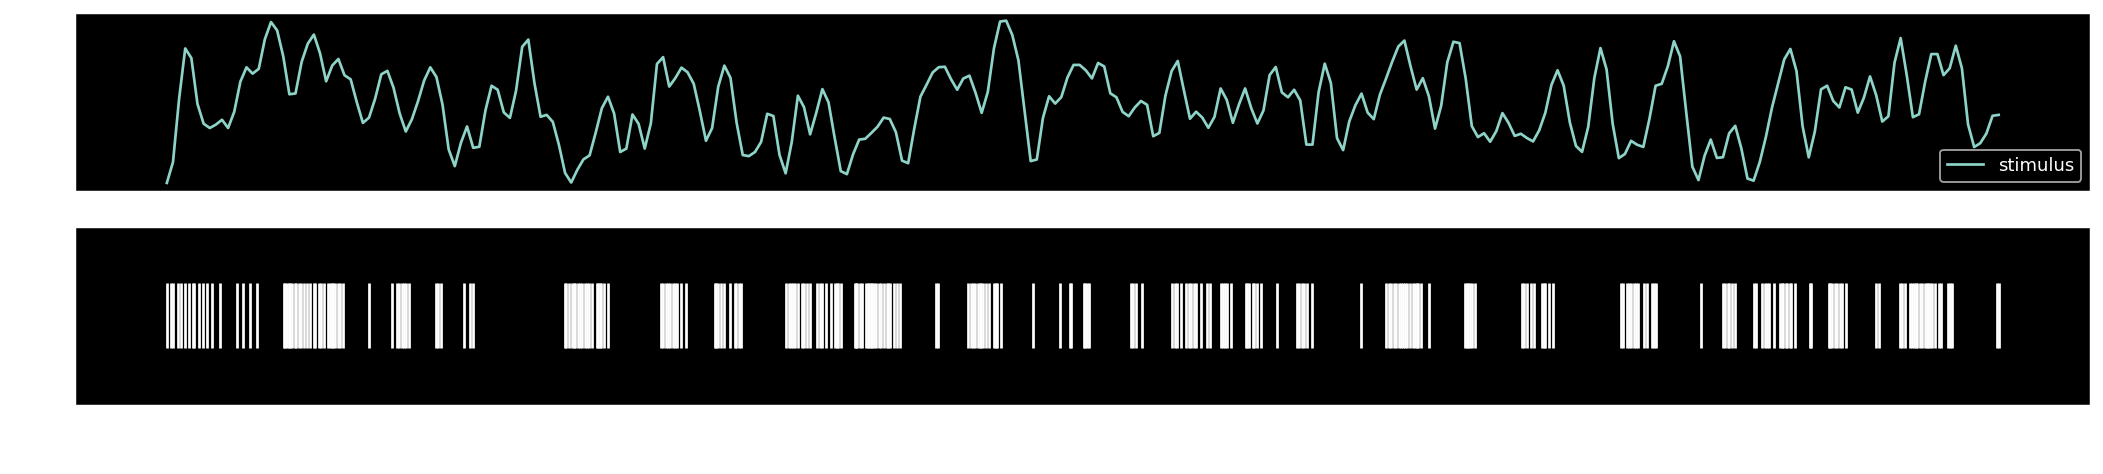

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(20, 4), dpi=130);
axs[0].plot(time[:300], stim[:300], label='stimulus');
axs[0].legend();
axs[1].eventplot(spike_times[:300], linelength=.8);
axs[1].set(xlabel='time, s');

Calculate spike triggered-average by going back for 300 ms (150 time steps)

In [7]:
sta_stim, sta_time = STA_new(stim, time, spikes, window=300)

Plot spike-triggered average stimulus

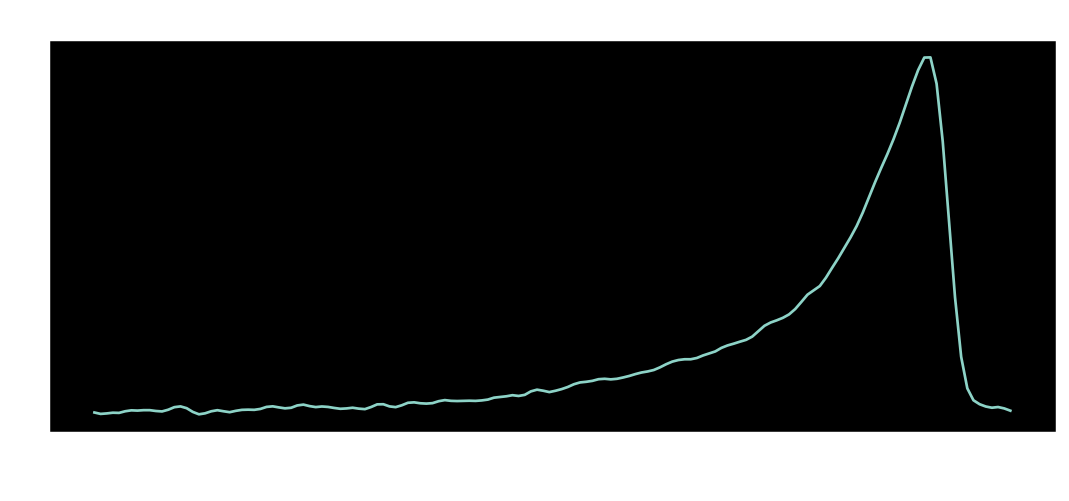

In [8]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=130);
ax.plot(sta_time, sta_stim, label='stimulus');
ax.set_title('Spike-triggered average stimulus');
ax.set(xlabel='time, s');